In [1]:
from datetime import datetime
from typing import List, Optional
from pydantic import BaseModel, conlist

class Adventurer(BaseModel):
    name: str
    profession: str
    level: int
    affinity: str


class QuestGiver(BaseModel):
    name: str
    faction: Optional[str]
    location: str


class Quest(BaseModel):
    name: str
    giver: QuestGiver
    reward_gold: int


class Party(BaseModel):
    name: str
    formed_datetime: datetime
    members: conlist(Adventurer, min_items=1) #List[Adventurer]
    active_quest: Optional[Quest]


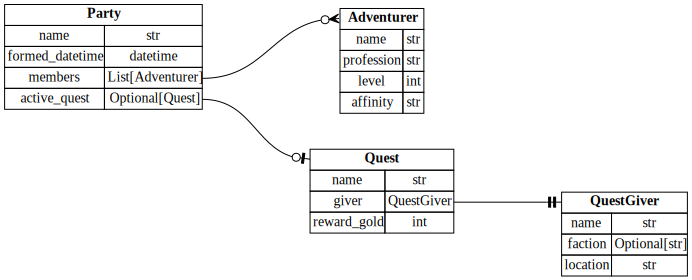

In [2]:
from pydantic_erd import create_erd

diagram = create_erd(Party)
diagram